In [ ]:
!git clone https://github.com/pqmsoft1/FinRL_single.git

Cloning into 'FinRL_single'...
remote: Enumerating objects: 64, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 64 (delta 2), reused 61 (delta 2), pack-reused 0
Unpacking objects: 100% (64/64), done.


In [23]:
!pip uninstall -y tensorflow==2.6.0

In [2]:
import tensorflow as tf
tf.__version__

'1.15.4'

'2.6.0'

In [ ]:
#!pip uninstall tensorflow

Found existing installation: tensorflow 2.6.0
Uninstalling tensorflow-2.6.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow-2.6.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
Proceed (y/n)? y
y
  Successfully uninstalled tensorflow-2.6.0


In [ ]:
!pip install yfinance
!pip install pandas
!pip install matplotlib
!pip install stockstats
!pip install gym
!pip install stable-baselines[mpi]
!pip install tensorflow==1.15.4

In [1]:
!pip install tensorflow==1.15.4

In [ ]:
!ls

contributing.md
docker
DRL_multiple_stock_trading.ipynb
DRL_single_stock_trading.ipynb
figs
finrl
FinRL_demo_docker.ipynb
FinRL_ensemble_stock_trading_ICAIF_2020.ipynb
FinRL_portfolio_allocation_NeurIPS_2020.ipynb
FinRL_single_stock_trading.ipynb
FinRL_stock_trading_fundamental.ipynb
FinRL_stock_trading_NeurIPS_2018.ipynb
LICENSE
main.py
notebooks
README.md
requirements.txt
setup.py
tests


In [ ]:
cd FinRL_single/

/content/FinRL_single


In [ ]:
import pkg_resources
import pip
installedPackages = {pkg.key for pkg in pkg_resources.working_set}
required = {'yfinance', 'pandas', 'matplotlib', 'stockstats','stable-baselines','gym','tensorflow'}
missing = required - installedPackages
if missing:
    !pip install yfinance
    !pip install pandas
    !pip install matplotlib
    !pip install stockstats
    !pip install gym
    !pip install stable-baselines[mpi]
    !pip install tensorflow==1.15.4

In [20]:
#import tensorflow.compat.v1 as tf
#tf.compat.v1.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [92]:
import yfinance as yf
from stockstats import StockDataFrame as Sdf

import pandas as pd
import matplotlib.pyplot as plt

import gym
from stable_baselines import PPO2, DDPG, A2C, ACKTR, TD3
from stable_baselines import DDPG
from stable_baselines import A2C
from stable_baselines import SAC
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines.common.policies import MlpPolicy

In [93]:
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

In [96]:
# Download and save the data in a pandas DataFrame:
#data_df = yf.download("AAPL", start="2009-01-01", end="2020-10-23")
data_df = yf.download("FB", start="2009-01-01", end="2021-09-20")

[*********************100%***********************]  1 of 1 completed


In [97]:
data_df.shape

(2349, 6)

In [98]:
# reset the index, we want to use numbers instead of dates
data_df=data_df.reset_index()

In [99]:
data_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200


In [100]:
data_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [101]:
# convert the column names to standardized names
data_df.columns = ['datadate','open','high','low','close','adjcp','volume']

In [102]:
# save the data to a csv file in your current folder
#data_df.to_csv('AAPL_2009_2020.csv')
data_df.to_csv('FB_2009_2021.csv')

In [103]:
# check missing data 
data_df.isnull().values.any()

False

In [104]:
# calculate technical indicators like MACD
stock = Sdf.retype(data_df.copy())
# we need to use adjusted close price instead of close price
stock['close'] = stock['adjcp']
data_df['macd'] = stock['macd']

In [105]:
# check missing data again
data_df.isnull().values.any()

False

In [106]:
data_df.head()

,datadate,open,high,low,close,adjcp,volume,macd
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400,0.000000
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700,-0.094231
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600,-0.214029
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000,-0.227165
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200,-0.188535


In [107]:
# Note that I always use a copy of the original data to try it track step by step.
data_clean = data_df.copy()

In [108]:
data_clean.head()

,datadate,open,high,low,close,adjcp,volume,macd
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400,0.000000
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700,-0.094231
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600,-0.214029
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000,-0.227165
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200,-0.188535


In [109]:
data_clean.tail()

,datadate,open,high,low,close,adjcp,volume,macd
2344,2021-09-13,381.679993,381.750000,374.350006,376.510010,376.510010,13026300,5.519337
2345,2021-09-14,377.399994,378.589996,375.109985,376.529999,376.529999,8711600,5.187009
2346,2021-09-15,377.000000,377.559998,367.670013,373.920013,373.920013,17940300,4.659324
2347,2021-09-16,372.790009,373.559998,369.709991,373.059998,373.059998,11934200,4.124192
2348,2021-09-17,371.410004,371.410004,361.589996,364.720001,364.720001,26274000,2.992630


In [110]:
import numpy as np
import pandas as pd
from gym.utils import seeding
import gym
from gym import spaces
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

# Global variables
HMAX_NORMALIZE = 200
INITIAL_ACCOUNT_BALANCE=100000
STOCK_DIM = 1

# transaction fee: 1/1000 reasonable percentage
TRANSACTION_FEE_PERCENT = 0.001
# REWARD_SCALING = 1e-3


class SingleStockEnv(gym.Env):
    """A stock trading environment for OpenAI gym"""
    metadata = {'render.modes': ['human']}

    def __init__(self, df,day = 0):
        #super(StockEnv, self).__init__()
        # date increment
        self.day = day
        self.df = df
        # action_space normalization and the shape is STOCK_DIM
        self.action_space = spaces.Box(low = -1, high = 1,shape = (STOCK_DIM,)) 
        # Shape = 4: [Current Balance]+[prices]+[owned shares] +[macd] 
        self.observation_space = spaces.Box(low=0, high=np.inf, shape = (4,))
        # load data from a pandas dataframe
        self.data = self.df.loc[self.day,:]
        # termination
        self.terminal = False  
        # save the total number of trades
        self.trades = 0
        # initalize state
        self.state = [INITIAL_ACCOUNT_BALANCE] + \
                      [self.data.adjcp] + \
                      [0]*STOCK_DIM + \
                      [self.data.macd] 
        # initialize reward and cost
        self.reward = 0
        self.cost = 0
        
        # memorize the total value, total rewards
        self.asset_memory = [INITIAL_ACCOUNT_BALANCE]
        self.rewards_memory = []

    def _sell_stock(self, index, action):
        # perform sell action based on the sign of the action
        if self.state[index+STOCK_DIM+1] > 0:
            # update balance
            self.state[0] += \
            self.state[index+1]*min(abs(action),self.state[index+STOCK_DIM+1]) * \
             (1- TRANSACTION_FEE_PERCENT)
            # update held shares
            self.state[index+STOCK_DIM+1] -= min(abs(action), self.state[index+STOCK_DIM+1])
            # update transaction costs
            self.cost +=self.state[index+1]*min(abs(action),self.state[index+STOCK_DIM+1]) * \
             TRANSACTION_FEE_PERCENT
            self.trades+=1
        else:
            pass
            
    def _buy_stock(self, index, action):
        # perform buy action based on the sign of the action
        available_amount = self.state[0] // self.state[index+1]
        #update balance
        self.state[0] -= self.state[index+1]*min(available_amount, action)* \
                          (1+ TRANSACTION_FEE_PERCENT)
        # update held shares
        self.state[index+STOCK_DIM+1] += min(available_amount, action)
        # update transaction costs
        self.cost+=self.state[index+1]*min(available_amount, action)* \
                          TRANSACTION_FEE_PERCENT
        self.trades+=1
        
    def step(self, actions):
        self.terminal = self.day >= len(self.df.index.unique())-1

        if self.terminal:
            plt.plot(self.asset_memory,'r')
            plt.savefig('account_value.png')
            plt.close()
            
            end_total_asset = self.state[0]+ \
            sum(np.array(self.state[1:(STOCK_DIM+1)])*np.array(self.state[(STOCK_DIM+1):(STOCK_DIM*2+1)]))
            print("previous_total_asset:{}".format(self.asset_memory[0])) 
            print("end_total_asset:{}".format(end_total_asset))
            
            df_total_value = pd.DataFrame(self.asset_memory)
            df_total_value.to_csv('account_value.csv')
            print("total_reward:{}".format(self.state[0]+sum(np.array(self.state[1:(STOCK_DIM+1)])*np.array(self.state[(STOCK_DIM+1):(STOCK_DIM*2+1)]))- INITIAL_ACCOUNT_BALANCE ))
            print("total_cost: ", self.cost)
            print("total trades: ", self.trades)
            
            df_total_value.columns = ['account_value']
            df_total_value['daily_return']=df_total_value.pct_change(1)
            
            if df_total_value['daily_return'].std()!=0:
                sharpe = (252**0.5)*df_total_value['daily_return'].mean()/ \
                      df_total_value['daily_return'].std()
                print("Sharpe: ",sharpe)
            df_rewards = pd.DataFrame(self.rewards_memory)
            df_rewards.to_csv('account_rewards.csv')
            return self.state, self.reward, self.terminal,{}

        else:
            
            # actions are the shares we need to buy, hold, or sell
            actions = actions * HMAX_NORMALIZE
            # calculate begining total asset
            begin_total_asset = self.state[0]+ \
            sum(np.array(self.state[1:(STOCK_DIM+1)])*np.array(self.state[(STOCK_DIM+1):(STOCK_DIM*2+1)]))
            
            # perform buy or sell action
            argsort_actions = np.argsort(actions)
            sell_index = argsort_actions[:np.where(actions < 0)[0].shape[0]]
            buy_index = argsort_actions[::-1][:np.where(actions > 0)[0].shape[0]]

            for index in sell_index:
                # print('take sell action'.format(actions[index]))
                self._sell_stock(index, actions[index])

            for index in buy_index:
                # print('take buy action: {}'.format(actions[index]))
                self._buy_stock(index, actions[index])
            
            # update data, walk a step s'
            self.day += 1
            self.data = self.df.loc[self.day,:]         
            #load next state
            self.state =  [self.state[0]] + \
                          [self.data.adjcp] + \
                          list(self.state[(STOCK_DIM+1):(STOCK_DIM*2+1)]) +\
                          [self.data.macd]
                        
            # calculate the end total asset
            end_total_asset = self.state[0]+ \
            sum(np.array(self.state[1:(STOCK_DIM+1)])*np.array(self.state[(STOCK_DIM+1):(STOCK_DIM*2+1)]))
            self.reward = end_total_asset - begin_total_asset  
            self.rewards_memory.append(self.reward)
            #self.reward = self.reward * REWARD_SCALING
            self.asset_memory.append(end_total_asset)

        return self.state, self.reward, self.terminal, {}

    def reset(self):
        self.asset_memory = [INITIAL_ACCOUNT_BALANCE]
        self.day = 0
        self.data = self.df.loc[self.day,:]
        self.cost = 0
        self.trades = 0
        self.terminal = False 
        self.rewards_memory = []
        #initiate state
        self.state = [INITIAL_ACCOUNT_BALANCE] + \
                      [self.data.adjcp] + \
                      [0]*STOCK_DIM + \
                      [self.data.macd]
        return self.state
    
    def render(self, mode='human'):
        return self.state

    def _seed(self, seed=None):
        self.np_random, seed = seeding.np_random(seed)
        return [seed]

In [113]:
train = data_clean[(data_clean.datadate>='2009-01-01') & (data_clean.datadate<'2021-01-01')]
# the index needs to start from 0
train=train.reset_index(drop=True)

In [114]:
train.head()

,datadate,open,high,low,close,adjcp,volume,macd
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400,0.000000
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700,-0.094231
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600,-0.214029
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000,-0.227165
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200,-0.188535


## Model Training: 4 models, PPO A2C, DDPG, TD3
## Model 1: PPO

In [115]:
#tensorboard --logdir ./single_stock_tensorboard/
env_train = DummyVecEnv([lambda: SingleStockEnv(train)])
model_ppo = PPO2('MlpPolicy', env_train, tensorboard_log="./single_stock_trading_2_tensorboard/")
model_ppo.learn(total_timesteps=100000,tb_log_name="run_aapl_ppo")
#model_ppo.save('AAPL_ppo_100k')

previous_total_asset:100000
end_total_asset:289630.06404324877
total_reward:189630.06404324877
total_cost:  28186.381610179495
total trades:  2149
Sharpe:  0.687893623784324
previous_total_asset:100000
end_total_asset:471706.76909140707
total_reward:371706.76909140707
total_cost:  29550.08081534966
total trades:  2168
Sharpe:  0.7446289706176707
previous_total_asset:100000
end_total_asset:885533.497878572
total_reward:785533.497878572
total_cost:  27229.768737224793
total trades:  2162
Sharpe:  0.9687348209063907
previous_total_asset:100000
end_total_asset:843480.0251046524
total_reward:743480.0251046524
total_cost:  27701.357311579828
total trades:  2164
Sharpe:  0.9155320592996474
previous_total_asset:100000
end_total_asset:870596.0681908259
total_reward:770596.0681908259
total_cost:  27773.255986719083
total trades:  2169
Sharpe:  0.9149147430522425
previous_total_asset:100000
end_total_asset:1191617.370662001
total_reward:1091617.370662001
total_cost:  24248.718428088177
total trad

In [118]:
#model_ppo.save('AAPL_ppo_100k')
model_sticker_save = 'FB_ppo_100k'
model_ppo.save(model_sticker_save)

## Model 2: DDPG

In [23]:
#tensorboard --logdir ./single_stock_tensorboard/
env_train = DummyVecEnv([lambda: SingleStockEnv(train)])
model_ddpg = DDPG('MlpPolicy', env_train, tensorboard_log="./single_stock_trading_2_tensorboard/")
#model_ddpg.learn(total_timesteps=100000, tb_log_name="run_aapl_ddpg")
#model_ddpg.save('AAPL_ddpg_50k')

Instructions for updating:
Use keras.layers.Dense instead.





previous_total_asset:100000
end_total_asset:530908.1766271881
total_reward:430908.1766271881
total_cost:  99.89333938293836
total trades:  2515
Sharpe:  0.8251849605200376
previous_total_asset:100000
end_total_asset:1078671.8280249892
total_reward:978671.8280249892
total_cost:  99.89525613572103
total trades:  2515
Sharpe:  1.0699754663297811
previous_total_asset:100000
end_total_asset:1078694.0364561095
total_reward:978694.0364561095
total_cost:  99.89726113786145
total trades:  2515
Sharpe:  1.0699793435050144
previous_total_asset:100000
end_total_asset:1078694.239338922
total_reward:978694.2393389221
total_cost:  99.89727936634799
total trades:  2515
Sharpe:  1.069979379009816
previous_total_asset:100000
end_total_asset:1078694.2409664027
total_reward:978694.2409664027
total_cost:  99.89727949373614
total trades:  2515
Sharpe:  1.0699793793213281
previous_total_asset:100000
end_total_asset:1078694.2409664027
total_rewar

In [ ]:
model_ddpg.learn(total_timesteps=100000, tb_log_name="run_aapl_ddpg")

In [34]:
#model_ddpg.save('AAPL_ddpg_50k')
model_ddpg.save(model_sticker_save)

## Model 3: A2C

In [24]:
#tensorboard --logdir ./single_stock_tensorboard/
env_train = DummyVecEnv([lambda: SingleStockEnv(train)])
model_a2c = A2C('MlpPolicy', env_train, tensorboard_log="./single_stock_trading_2_tensorboard/")
model_a2c.learn(total_timesteps=100000,tb_log_name="run_aapl_a2c")
#model_a2c.save('AAPL_a2c_50k')


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
previous_total_asset:100000
end_total_asset:254239.59154683637
total_reward:154239.59154683637
total_cost:  6362.935895954918
total trades:  2515
Sharpe:  0.7317203215967037
previous_total_asset:100000
end_total_asset:249916.19740752212
total_reward:149916.19740752212
total_cost:  6603.823403136722
total trades:  2514
Sharpe:  0.6448699009435445
previous_total_asset:100000
end_total_asset:621594.1094674462
total_reward:521594.1094674462
total_cost:  6491.033704666397
total trades:  2514
Sharpe:  0.9180623924831595
previous_total_asset:100000
end_total_asset:657301.1662907135
total_reward:557301.1662907135
total_cost:  6906.766211603344
total trades:  2515
Sharpe:  0.9490596606172836
previous_total_asset:100000
end_total_asset:888767.7344412032
total_reward:788767.7344412032
total_cost:  4749.658908376857
total trades:  2515
Sharpe:  1.0178306722621673
previous_total_as

In [33]:
#model_a2c.save('AAPL_a2c_50k')
model_a2c.save(model_sticker_save)

## Model 4: TD3

In [25]:
#tensorboard --logdir ./single_stock_tensorboard/
#DQN<DDPG<TD3
env_train = DummyVecEnv([lambda: SingleStockEnv(train)])
model_td3 = TD3('MlpPolicy', env_train, tensorboard_log="./single_stock_trading_2_tensorboard/")
#model_td3.learn(total_timesteps=100000,tb_log_name="run_aapl_td3")
#model_td3.save('AAPL_td3_50k')


previous_total_asset:100000
end_total_asset:104474.38490228458
total_reward:4474.3849022845825
total_cost:  39.45173212305912
total trades:  112
Sharpe:  0.6479914057415437
previous_total_asset:100000
end_total_asset:100000.0
total_reward:0.0
total_cost:  0
total trades:  0
previous_total_asset:100000
end_total_asset:100000.0
total_reward:0.0
total_cost:  0
total trades:  0
previous_total_asset:100000
end_total_asset:100000.0
total_reward:0.0
total_cost:  0
total trades:  0
previous_total_asset:100000
end_total_asset:100000.0
total_reward:0.0
total_cost:  0
total trades:  0
previous_total_asset:100000
end_total_asset:100000.0
total_reward:0.0
total_cost:  0
total trades:  0
previous_total_asset:100000
end_total_asset:100000.0
total_reward:0.0
total_cost:  0
total trades:  0
previous_total_asset:100000
end_total_asset:100000.0
total_reward:0.0
total_cost:  0
total trades:  0
previous_total_asset:100000
end_total_asset:100000.0
total_reward:0.0
total_cost:  0
total trades:  0
previous_to

In [ ]:
model_td3.learn(total_timesteps=100000,tb_log_name="run_aapl_td3")

In [32]:
#model_td3.save('AAPL_td3_50k')
model_td3.save(model_sticker_save)

## Testing data

In [119]:
test = data_clean[(data_clean.datadate>='2021-01-01') ]
# the index needs to start from 0
test=test.reset_index(drop=True)

## Load model from file save

## Load model PPO

In [121]:
env_train = DummyVecEnv([lambda: SingleStockEnv(train)])
model_ppo = PPO2('MlpPolicy', env_train, tensorboard_log="./single_stock_trading_2_tensorboard/")
#model_ppo.load('AAPL_ppo_100k.zip')
model_ppo.load(model_sticker_save)


## Load models a2c

In [68]:
env_train = DummyVecEnv([lambda: SingleStockEnv(train)])
model_a2c = A2C('MlpPolicy', env_train, tensorboard_log="./single_stock_trading_2_tensorboard/")
model_a2c.load('AAPL_a2c_50k.zip')

## Load model ddpg

In [69]:
env_train = DummyVecEnv([lambda: SingleStockEnv(train)])
model_ddpg = DDPG('MlpPolicy', env_train, tensorboard_log="./single_stock_trading_2_tensorboard/")
model_ddpg.load('AAPL_ddpg_50k.zip')


## Load model td3

In [70]:
env_train = DummyVecEnv([lambda: SingleStockEnv(train)])
model_td3 = TD3('MlpPolicy', env_train, tensorboard_log="./single_stock_trading_2_tensorboard/")
model_td3.load('AAPL_td3_50k.zip')


In [122]:
test.head()

,datadate,open,high,low,close,adjcp,volume,macd
0,2021-01-04,274.779999,275.000000,265.200012,268.940002,268.940002,15106100,-1.392121
1,2021-01-05,268.290009,272.399994,268.209991,270.970001,270.970001,9871600,-1.439716
2,2021-01-06,262.000000,267.750000,260.010010,263.309998,263.309998,24354100,-2.071652
3,2021-01-07,265.899994,271.609985,264.779999,268.739990,268.739990,15789800,-2.109989
4,2021-01-08,268.309998,268.950012,263.179993,267.570007,267.570007,18528300,-2.209312


# Trading
Assume that we have $100,000 initial capital at 2019-01-01. We use the TD3 model to trade AAPL.

## sau khi chay xong: create file account_rewards.csv, account_value.csv, account_value.png 

In [123]:

#model = model_a2c
model = model_ppo
#model = model_td3
#model = model_ddpg
env_test = DummyVecEnv([lambda: SingleStockEnv(test)])
obs_test = env_test.reset()
print("==============Model Prediction===========")
for i in range(len(test.index.unique())):
    action, _states = model.predict(obs_test)
    obs_test, rewards, dones, info = env_test.step(action)
    env_test.render()

#==> Create file account_rewards.csv, account_value.csv, account_value.png sau khi chay xong

==============Model Prediction===========
previous_total_asset:100000
end_total_asset:115175.9747234007
total_reward:15175.974723400694
total_cost:  3936.7178527573674
total trades:  166
Sharpe:  1.1186671974856492


## Part 5: Backtest Our Strategy
For simplicity purposes, in the article, we just calculate the Sharpe ratio and the annual return manually.

In [124]:

def get_DRL_sharpe():
    df_total_value=pd.read_csv('account_value.csv',index_col=0)
    df_total_value.columns = ['account_value']
    df_total_value['daily_return']=df_total_value.pct_change(1)
    sharpe = (252**0.5)*df_total_value['daily_return'].mean()/ \
    df_total_value['daily_return'].std()
    
    annual_return = ((df_total_value['daily_return'].mean()+1)**252-1)*100
    print("annual return: ", annual_return)
    print("sharpe ratio: ", sharpe)
    return df_total_value

In [125]:
def get_buy_and_hold_sharpe(test):
    test['daily_return']=test['adjcp'].pct_change(1)
    sharpe = (252**0.5)*test['daily_return'].mean()/ \
    test['daily_return'].std()
    annual_return = ((test['daily_return'].mean()+1)**252-1)*100
    print("annual return: ", annual_return)

    print("sharpe ratio: ", sharpe)
    #return sharpe

In [126]:
df_total_value=get_DRL_sharpe()

annual return:  24.472945519393562
sharpe ratio:  1.1186671974856477


In [127]:
get_buy_and_hold_sharpe(test)

annual return:  60.19225156336259
sharpe ratio:  1.6587214035502278


In [128]:
DRL_cumulative_return = (df_total_value.account_value.pct_change(1)+1).cumprod()-1

In [129]:
buy_and_hold_cumulative_return = (test.adjcp.pct_change(1)+1).cumprod()-1

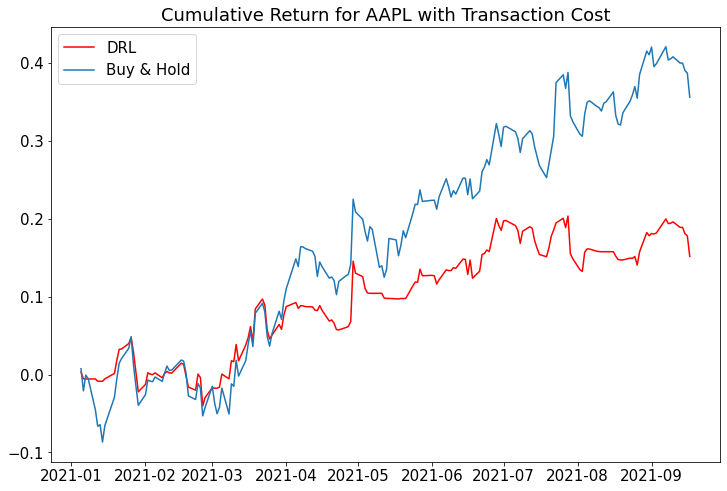

In [130]:

%matplotlib inline
fig, ax = plt.subplots(figsize=(12, 8))

plt.plot(test.datadate, DRL_cumulative_return, color='red',label = "DRL")
plt.plot(test.datadate, buy_and_hold_cumulative_return, label = "Buy & Hold")
plt.title("Cumulative Return for AAPL with Transaction Cost",size= 18)
plt.legend()
plt.rc('legend',fontsize=15)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

In [82]:
from google.colab import files

files.download('AAPL_a2c_50k.zip')
files.download('AAPL_td3_50k.zip')
files.download('AAPL_ppo_100k.zip')
files.download('AAPL_ddpg_50k.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>